# Monte Carlo simulation MAMR1C 2T

<img src="MAR1C-RN.PNG" width="400"> 

In [48]:
__author__ ='Sung Chung'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import datetime

pd.set_option('display.max_column',500)

### input 
V0=100

T0=0
PCM_FACTOR =1.0
num_samples=10000

RT_dTdW=108*PCM_FACTOR                             #RTG dT / dW slope   
RS_dTdW=62*PCM_FACTOR                             #RSG dT / dW slope 

fname="MAMR1C_" + "_" + str(V0) +"mV"
# RT, RT_sigma = 11.37,0.5  
# RT0, RT0_sigma = 1.2, 0.06 
# RTC, RTC_sigma = 10.17, 0.01  
# RS, RS_sigma = 2.50, 0.1 
# RS0, RS0_sigma = 1.00, 0.05  
# RSC, RSC_sigma = 6, 0.01 
# RL0,RL0_sigma=1.45,0.075
# RM0,RM0_sigma=2.49,0.125  

# RT, RT_sigma = 11.37,2  
# RT0, RT0_sigma = 1.2, 0.06 
# RTC, RTC_sigma = 0.1, 0.01  
# RS, RS_sigma = 2.50, 0.5 
# RS0, RS0_sigma = 1.00, 0.05  
# RSC, RSC_sigma = 0.06, 0.01 
# RL0,RL0_sigma=1.45,0.075
# RM0,RM0_sigma=2.49,0.125  
 


def getSTOR(TG_R,SG_R,RL):
    TG_SG_resistance =  (TG_R)*(SG_R)/(TG_R+SG_R)
    STOR= (RL+TG_SG_resistance)
    return (TG_SG_resistance, STOR)

#normal distribution b 
RT_n=np.random.normal(RT,RT_sigma,num_samples)
RT0_n=np.random.normal(RT0,RT0_sigma,num_samples)
RTC_n=np.random.normal(RTC,RTC_sigma,num_samples)
RS_n=np.random.normal(RS,RS_sigma,num_samples)
RS0_n=np.random.normal(RS0,RS0_sigma,num_samples)
RSC_n=np.random.normal(RSC,RSC_sigma,num_samples)
RL0_n=np.random.normal(RL0,RL0_sigma,num_samples)
RM0_n=np.random.normal(RM0,RM0_sigma,num_samples)


df=pd.DataFrame({'RT':RT_n,'RT0':RT0_n,'RTC':RTC_n,'RS':RS_n,'RS0':RS0_n, 'RSC':RSC_n,'RL0':RL0_n,'RM0':RM0_n})

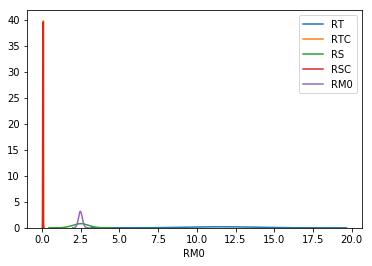

In [49]:
sns.distplot(df['RT'],hist=False,label="RT");
sns.distplot(df['RTC'],hist=False,label="RTC");
sns.distplot(df['RS'],hist=False,label="RS");
sns.distplot(df['RSC'],hist=False,label="RSC");
ax=sns.distplot(df['RM0'],hist=False,label="RM0");

,RT,RT0,RTC,RS,RS0,RSC,RL0,RM0,RTL,RSL,TG_R,SG_R,RL,TG_SG_R,STOR
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,11.35,1.20,0.10,2.50,1.00,0.06,1.45,2.49,1.30,1.06,12.65,3.56,3.94,2.76,6.70
std,1.99,0.06,0.01,0.49,0.05,0.01,0.08,0.13,0.06,0.05,1.99,0.50,0.15,0.32,0.35
min,4.15,0.98,0.06,0.70,0.78,0.02,1.15,2.05,1.08,0.84,5.45,1.74,3.26,1.56,5.41
25%,10.01,1.16,0.09,2.17,0.97,0.05,1.40,2.40,1.26,1.03,11.32,3.23,3.84,2.54,6.46
50%,11.34,1.20,0.10,2.50,1.00,0.06,1.45,2.49,1.30,1.06,12.64,3.56,3.94,2.76,6.70
75%,12.68,1.24,0.11,2.83,1.03,0.07,1.50,2.57,1.34,1.09,13.98,3.89,4.04,2.97,6.93
max,18.67,1.43,0.14,4.31,1.17,0.10,1.75,2.97,1.55,1.24,19.97,5.35,4.53,4.03,8.03


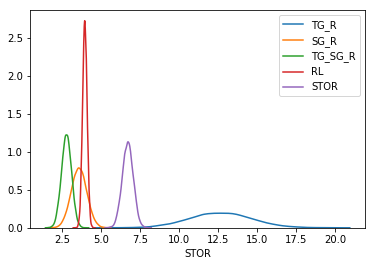

In [50]:
df['RTL']=df['RT0']+df['RTC']
df['RSL']=df['RS0']+df['RSC']

df['TG_R']=df['RT']+df['RTL']
df['SG_R']=df['RS']+df['RSL']
df['RL']=df['RL0']+df['RM0']
ans=np.vectorize(getSTOR)

df['TG_SG_R']=ans(df.TG_R,df.SG_R,df.RL)[0]
df['STOR']=ans(df.TG_R,df.SG_R,df.RL)[1]

sns.distplot(df['TG_R'],hist=False,label="TG_R");
sns.distplot(df['SG_R'],hist=False,label="SG_R");
sns.distplot(df['TG_SG_R'],hist=False,label="TG_SG_R");
sns.distplot(df['RL'],hist=False,label="RL");
sns.distplot(df['STOR'],hist=False,label="STOR",);

df.describe().round(2)

In [51]:
# Io can be calculated based on voltage at RT



<img src="simpleSTOR.PNG" width=500> 

In [52]:
# Calculate T-Slope for SG and TG (deltaT/deltaT)
df['bias_current']=V0/df['TG_SG_R']

df['TG_iRatio']=df['SG_R']/(df['TG_R']+df['SG_R'])
df['SG_iRatio']=1-df['TG_iRatio']
df['iTG']=df['bias_current']*df['TG_iRatio']
df['iSG']=df['bias_current']-df['iTG']

df['pwRTG']=(df['iTG']**2)*df['RT']/1000
df['pwRSG']=(df['iSG']**2)*df['RS']/1000

df['dT_RTG']=RT_dTdW*df['pwRTG']
df['dT_RSG']=RS_dTdW*df['pwRSG']
df['dTemp']=df['dT_RTG']+df['dT_RSG']
df['Temp']=df['dTemp']+T0

now=datetime.datetime.now()
month=now.month
day=now.day
second=now.second
df.to_csv(fname + "-{}-{}_{}sec.csv".format(month, day, second))
df.describe()

,RT,RT0,RTC,RS,RS0,RSC,RL0,RM0,RTL,RSL,TG_R,SG_R,RL,TG_SG_R,STOR,bias_current,TG_iRatio,SG_iRatio,iTG,iSG,pwRTG,pwRSG,dT_RTG,dT_RSG,dTemp,Temp
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.349648,1.201405,0.099919,2.502224,0.999700,0.060101,1.449947,2.487489,1.301324,1.059801,12.650972,3.562025,3.937436,2.757996,6.695432,36.765546,0.222384,0.777616,8.114573,28.650973,0.723332,1.977288,78.119823,122.591844,200.711668,200.711668
std,1.986162,0.059652,0.009894,0.494067,0.049971,0.009963,0.075294,0.125309,0.060493,0.051140,1.986948,0.496181,0.145575,0.318886,0.350004,4.454127,0.037250,0.037250,1.378049,4.235394,0.106268,0.162971,11.476908,10.104203,15.310853,15.310853
min,4.153623,0.976174,0.063233,0.703049,0.781108,0.022704,1.154216,2.051546,1.081092,0.839937,5.449565,1.742752,3.261601,1.564218,5.408042,24.841850,0.096461,0.567772,5.007711,18.676156,0.468225,1.485676,50.568324,92.111911,150.537493,150.537493
25%,10.013755,1.161253,0.093251,2.167798,0.966817,0.053427,1.398612,2.404656,1.260218,1.025473,11.323014,3.226316,3.840303,2.544271,6.462238,33.621948,0.196332,0.754143,7.155102,25.687339,0.648556,1.863333,70.044087,115.526676,189.830890,189.830890
50%,11.337630,1.202046,0.099900,2.499345,0.999933,0.060066,1.449554,2.486253,1.301591,1.059980,12.641391,3.561237,3.936632,2.759498,6.697282,36.238475,0.219617,0.780383,7.910522,28.080131,0.709271,1.969198,76.601218,122.090258,199.709649,199.709649
75%,12.679230,1.241528,0.106468,2.834854,1.033142,0.066679,1.501180,2.571056,1.341660,1.093899,13.976042,3.892968,4.035999,2.974248,6.930622,39.303991,0.245857,0.803668,8.831570,30.995105,0.782378,2.087104,84.496858,129.400475,210.284013,210.284013
max,18.671375,1.425583,0.138286,4.313245,1.170250,0.100727,1.748684,2.965434,1.548581,1.235080,19.969204,5.354421,4.525158,4.025465,8.028858,63.929721,0.432228,0.903539,18.350088,57.380510,1.398632,2.592213,151.052212,160.717234,274.507981,274.507981


In [53]:
df.head()

,RT,RT0,RTC,RS,RS0,RSC,RL0,RM0,RTL,RSL,TG_R,SG_R,RL,TG_SG_R,STOR,bias_current,TG_iRatio,SG_iRatio,iTG,iSG,pwRTG,pwRSG,dT_RTG,dT_RSG,dTemp,Temp
0,10.629563,1.258590,0.095736,1.816258,0.964051,0.052661,1.404778,2.574392,1.354326,1.016711,11.983889,2.832969,3.979169,2.291308,6.270477,43.643194,0.191199,0.808801,8.344537,35.298658,0.740150,2.263048,79.936220,140.308997,220.245217,220.245217
1,10.512434,1.112202,0.107240,1.664809,1.060197,0.041856,1.443014,2.449558,1.219442,1.102053,11.731877,2.766862,3.892572,2.238849,6.131421,44.665812,0.190835,0.809165,8.523785,36.142027,0.763780,2.174650,82.488248,134.828299,217.316547,217.316547
2,9.489002,0.976174,0.104917,2.049196,0.953029,0.051611,1.467200,2.547856,1.081092,1.004640,10.570094,3.053836,4.015056,2.369312,6.384368,42.206350,0.224152,0.775848,9.460654,32.745696,0.849303,2.197314,91.724767,136.233442,227.958208,227.958208
3,13.527018,1.174692,0.108614,1.876723,0.997372,0.058529,1.500023,2.453266,1.283306,1.055901,14.810324,2.932624,3.953289,2.447909,6.401198,40.851198,0.165284,0.834716,6.752047,34.099151,0.616699,2.182164,66.603445,135.294169,201.897614,201.897614
4,9.871092,1.195844,0.095353,2.700258,0.928398,0.051281,1.496171,2.512058,1.291196,0.979679,11.162289,3.679937,4.008229,2.767544,6.775773,36.133117,0.247937,0.752063,8.958736,27.174381,0.792244,1.993997,85.562304,123.627818,209.190122,209.190122


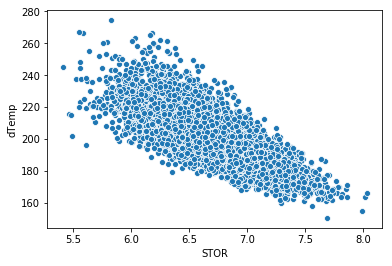

In [54]:
sns.scatterplot(x=df.STOR,y=df.dTemp)

,STOR,dT_RTG,dT_RSG,dTemp
count,10000.00,10000.00,10000.00,10000.00
mean,6.70,78.12,122.59,200.71
std,0.35,11.48,10.10,15.31
min,5.41,50.57,92.11,150.54
25%,6.46,70.04,115.53,189.83
50%,6.70,76.60,122.09,199.71
75%,6.93,84.50,129.40,210.28
max,8.03,151.05,160.72,274.51


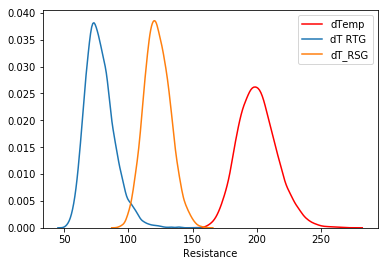

In [55]:
sns.distplot(df['dTemp'],hist=False,label='dTemp',color='r');
sns.distplot(df['dT_RTG'],hist=False,label="dT RTG");
sns.distplot(df['dT_RSG'],hist=False,label="dT_RSG");
plt.xlabel("Resistance")


df.describe().to_csv('RTG 20%, RSG: 10%, all lead 5%')
df[['STOR','dT_RTG','dT_RSG','dTemp']].describe().round(2)

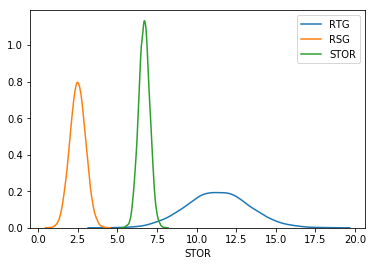

In [56]:


sns.distplot(df['RT'],hist=False,label="RTG");
sns.distplot(df['RS'],hist=False,label="RSG");
sns.distplot(df['STOR'],hist=False,label="STOR",);
# plt.xlim(left=4.7, right=6.5)
